In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



Bad key "text.kerning_factor" on line 4 in
C:\Users\sarahwang\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [6]:
demographics = pd.read_csv("2018_demographic_data_edited.csv", delimiter=',')

In [10]:
demographics = demographics.fillna(demographics.mean())

In [11]:
demographics.describe()

,zip,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_ZCTA3,Geo_ZCTA5,SE_A00001_001,SE_A00002_001,SE_A00002_002,SE_A00002_003,...,SE_A10065_001,SE_A10065_002,SE_A10066_001,SE_A10066_002,SE_A10066_003,SE_A10066_004,SE_A10066_005,SE_A10066_006,SE_A10066_007,SE_A10066_008
count,33120.000000,33120.0,33120.0,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,...,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000
mean,49666.334209,860.0,0.0,27133.131733,496.238436,49666.334209,9851.278865,9851.278865,1324.241736,86.644736,...,1964.227295,600.363919,3651.366153,1012.766425,1236.594263,573.617512,473.673068,218.724789,83.679046,52.311051
std,27564.925769,0.0,0.0,9584.389017,275.662147,27564.925769,14614.856872,14614.856872,5325.045360,253.611567,...,3132.140037,1107.623702,5268.749991,1586.915504,1727.712879,873.542539,755.573189,373.414777,165.377889,134.892394
min,601.000000,860.0,0.0,7459.000000,6.000000,601.000000,0.000000,0.000000,0.000000,0.001967,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26634.750000,860.0,0.0,18865.750000,266.000000,26634.750000,705.000000,705.000000,19.785222,9.053683,...,116.000000,22.000000,270.000000,68.000000,105.000000,34.000000,25.000000,11.000000,0.000000,0.000000
50%,49739.000000,860.0,0.0,27145.500000,497.000000,49739.000000,2803.500000,2803.500000,79.488960,35.868358,...,513.000000,127.000000,1066.000000,269.000000,403.000000,153.000000,120.000000,55.000000,19.000000,9.000000
75%,72123.500000,860.0,0.0,35425.250000,721.000000,72123.500000,13378.500000,13378.500000,682.169350,88.554180,...,2529.000000,651.000000,5023.000000,1292.000000,1731.000000,769.000000,610.000000,262.000000,90.000000,47.000000
max,99929.000000,860.0,0.0,43705.000000,999.000000,99929.000000,122814.000000,122814.000000,275429.200000,13467.648720,...,46427.000000,14563.000000,41910.000000,18266.000000,20619.000000,7709.000000,10465.000000,5135.000000,2564.000000,5228.000000


In [12]:
from sklearn.mixture import GaussianMixture

In [26]:
demographics.set_index('zip')

,zip,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_ZCTA3,Geo_ZCTA5,SE_A00001_001,SE_A00002_001,SE_A00002_002,SE_A00002_003,...,SE_A10065_001,SE_A10065_002,SE_A10066_001,SE_A10066_002,SE_A10066_003,SE_A10066_004,SE_A10066_005,SE_A10066_006,SE_A10066_007,SE_A10066_008
0,601,860,0,7459,6,601,17242,17242,267.950600,64.347690,...,3237,1849,5517,1346,1768,1222,889,214,46,32
1,602,860,0,7460,6,602,38442,38442,1255.421000,30.620812,...,5636,2721,12738,3107,4024,2467,2345,588,163,44
2,603,860,0,7461,6,603,48814,48814,1543.925000,31.616820,...,8627,4772,19233,5121,6256,4058,2523,1085,118,72
3,606,860,0,7462,6,606,6437,6437,152.142300,42.309073,...,975,588,2014,474,693,343,343,120,19,22
4,610,860,0,7463,6,610,27073,27073,753.856200,35.912685,...,4317,2125,8858,2194,2972,1679,1440,486,55,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,99923,860,0,43701,999,99923,15,15,0.921434,16.278967,...,0,0,15,15,0,0,0,0,0,0
33116,99925,860,0,43702,999,99925,927,927,16.614850,55.793445,...,166,73,325,107,99,38,38,21,8,14
33117,99926,860,0,43703,999,99926,1635,1635,12.311960,132.797749,...,372,134,480,87,159,88,55,31,41,19
33118,99927,860,0,43704,999,99927,38,38,0.166900,227.680635,...,0,0,29,19,10,0,0,0,0,0


In [108]:
demographics1 = demographics[['zip', 'SE_B01001_003']]
demographics1=demographics1.loc[demographics1['SE_B01001_003']!=0]
demographics1=demographics1.loc[demographics1['SE_B01001_003']>100]
demographics1=demographics1.loc[demographics1['SE_B01001_003']<10000]
demographics_np1 = demographics1.to_numpy()
demographics1

,zip,SE_B01001_003
0,601,3809
1,602,8456
3,606,1320
4,610,5718
6,616,2754
...,...,...
33112,99919,102
33113,99921,380
33116,99925,173
33117,99926,367


In [109]:
demographics1.describe()

,zip,SE_B01001_003
count,23808.000000,23808.000000
mean,47861.088710,2074.810568
std,27178.780787,2465.508115
min,601.000000,101.000000
25%,26023.250000,306.000000
50%,47245.000000,888.500000
75%,70079.250000,3051.250000
max,99929.000000,9999.000000


In [106]:
demographics1.loc[demographics1['SE_B01001_003']>10000]

,zip,SE_B01001_003
2,603,10515
5,612,12675
33,680,11976
41,693,12179
56,725,17403
...,...,...
32876,99362,11159
32885,99504,12229
32888,99507,10276
32889,99508,10736


In [17]:
demographics_np = demographics.to_numpy()

In [27]:
demographics_np

array([[6.0100e+02, 8.6000e+02, 0.0000e+00, ..., 2.1400e+02, 4.6000e+01,
        3.2000e+01],
       [6.0200e+02, 8.6000e+02, 0.0000e+00, ..., 5.8800e+02, 1.6300e+02,
        4.4000e+01],
       [6.0300e+02, 8.6000e+02, 0.0000e+00, ..., 1.0850e+03, 1.1800e+02,
        7.2000e+01],
       ...,
       [9.9926e+04, 8.6000e+02, 0.0000e+00, ..., 3.1000e+01, 4.1000e+01,
        1.9000e+01],
       [9.9927e+04, 8.6000e+02, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [9.9929e+04, 8.6000e+02, 0.0000e+00, ..., 5.1000e+01, 9.0000e+00,
        5.0000e+00]])

In [110]:
gmm = GaussianMixture(n_components=4, covariance_type='full')
gmm_fit = gmm.fit(demographics_np1)


In [160]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

C:\Users\sarahwang\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Log scale: values of z <= 0 have been masked
  
C:\Users\sarahwang\anaconda3\lib\site-packages\matplotlib\contour.py:1526: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\sarahwang\anaconda3\lib\site-packages\matplotlib\contour.py:1200: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
C:\Users\sarahwang\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: No contour levels were found within the data range.
  
C:\Users\sarahwang\anaconda3\lib\site-packages\matplotlib\colors.py:1108: RuntimeWarning: invalid value encountered in less_equal
  mask = (resdat <= 0)
C:\Users\sarahwang\anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


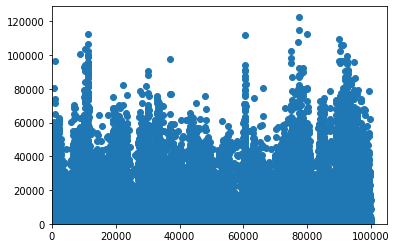

In [71]:
X, Y = np.meshgrid(np.linspace(-5.0, 3.0,300), np.linspace(-4.0, 4.0,300))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z_shape = (int(np.sqrt(len(Z))),int(np.sqrt(len(Z))))
Z = Z.reshape(Z_shape)
 
plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 15))
plt.scatter(demographics_np1[:, 0], demographics_np1[:, 1])
 
plt.show()

In [65]:
Z = gmm.score_samples(XX)
Z_shape = (int(np.sqrt(len(Z))),int(np.sqrt(len(Z))))
Z = Z.reshape(Z_shape)
Z

array([[-22.09599276, -22.09599069, -22.09598862, ..., -22.09537792,
        -22.09537585, -22.09537378],
       [-22.09593767, -22.0959356 , -22.09593353, ..., -22.09532283,
        -22.09532076, -22.09531869],
       [-22.09588259, -22.09588052, -22.09587845, ..., -22.09526775,
        -22.09526568, -22.09526361],
       ...,
       [-22.07969342, -22.07969135, -22.07968928, ..., -22.07907864,
        -22.07907657, -22.0790745 ],
       [-22.07963874, -22.07963667, -22.0796346 , ..., -22.07902397,
        -22.0790219 , -22.07901983],
       [-22.07958407, -22.079582  , -22.07957993, ..., -22.0789693 ,
        -22.07896723, -22.07896516]])

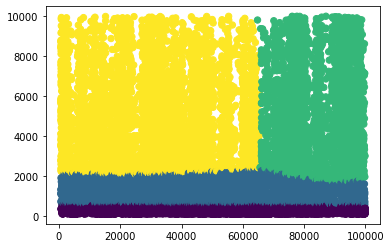

In [111]:
labels = gmm.predict(demographics_np1)
plt.scatter(demographics_np1[:, 0], demographics_np1[:, 1], c=labels, s=40, cmap='viridis');

In [112]:
labels

array([3, 3, 1, ..., 0, 0, 0], dtype=int64)

In [120]:
first_cluster = np.where(labels==1)
first_cluster

(array([    2,     6,    15, ..., 23789, 23795, 23799], dtype=int64),)

In [117]:
second_cluster = np.where(labels==2)

In [118]:
third_cluster = np.where(labels==3)

In [193]:
forth_cluster = np.where(labels==0)
forth_cluster

(array([   10,    56,    68, ..., 23805, 23806, 23807], dtype=int64),)

In [194]:
first_group = demographics1.iloc[first_cluster]
second_group = demographics1.iloc[second_cluster]
third_group = demographics1.iloc[third_cluster]
forth_group = demographics1.iloc[forth_cluster]
first_group

,zip,SE_B01001_003
3,606,1320
8,622,1127
17,647,1090
19,652,711
28,670,1901
...,...,...
33057,99752,885
33067,99762,1110
33080,99775,1176
33097,99824,577


In [146]:
sales_data = pd.read_csv("test.csv", header = 1).set_index('Region')
sales_data.index = sales_data.index.astype(int)
sales_data = sales_data.dropna(how = 'all', axis = 0)
sales_data = sales_data.fillna(0)
len(first_group.zip.tolist())

6537

In [153]:
demographics = demographics.set_index('zip')
demographics

,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_ZCTA3,Geo_ZCTA5,SE_A00001_001,SE_A00002_001,SE_A00002_002,SE_A00002_003,SE_A00003_001,...,SE_A10065_001,SE_A10065_002,SE_A10066_001,SE_A10066_002,SE_A10066_003,SE_A10066_004,SE_A10066_005,SE_A10066_006,SE_A10066_007,SE_A10066_008
zip,,,,,,,,,,,,,,,,,,,,,
601,860,0,7459,6,601,17242,17242,267.950600,64.347690,64.65630,...,3237,1849,5517,1346,1768,1222,889,214,46,32
602,860,0,7460,6,602,38442,38442,1255.421000,30.620812,32.33064,...,5636,2721,12738,3107,4024,2467,2345,588,163,44
603,860,0,7461,6,603,48814,48814,1543.925000,31.616820,31.68686,...,8627,4772,19233,5121,6256,4058,2523,1085,118,72
606,860,0,7462,6,606,6437,6437,152.142300,42.309073,42.31390,...,975,588,2014,474,693,343,343,120,19,22
610,860,0,7463,6,610,27073,27073,753.856200,35.912685,37.52353,...,4317,2125,8858,2194,2972,1679,1440,486,55,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99923,860,0,43701,999,99923,15,15,0.921434,16.278967,16.27978,...,0,0,15,15,0,0,0,0,0,0
99925,860,0,43702,999,99925,927,927,16.614850,55.793445,70.04176,...,166,73,325,107,99,38,38,21,8,14
99926,860,0,43703,999,99926,1635,1635,12.311960,132.797749,245.87120,...,372,134,480,87,159,88,55,31,41,19


In [205]:
first_group_zip = [i for i in first_group.zip.tolist() if i in sales_data.index]
first_group_sales = sales_data.loc[first_group_zip]
first_group_demo = demographics.loc[first_group_zip]
second_group_zip = [i for i in second_group.zip.tolist() if i in sales_data.index]
second_group_sales = sales_data.loc[second_group_zip]
second_group_demo = demographics.loc[second_group_zip]
third_group_zip = [i for i in third_group.zip.tolist() if i in sales_data.index]
third_group_sales = sales_data.loc[third_group_zip]
third_group_demo = demographics.loc[third_group_zip]
forth_group_zip = [i for i in forth_group.zip.tolist() if i in sales_data.index]
forth_group_sales = sales_data.loc[forth_group_zip]
forth_group_demo = demographics.loc[forth_group_zip]

In [202]:
first_group_sales['01/12/2019']

1005     0.07
1082     0.41
1430    -0.10
1432    -0.06
1436     0.08
         ... 
99109    0.36
99141    0.71
99357    0.00
99587    0.65
99652   -0.31
Name: 01/12/2019, Length: 3266, dtype: float64

In [203]:
first_group_sales = first_group_sales['01/12/2019']
second_group_sales = second_group_sales['01/12/2019']
third_group_sales = third_group_sales['01/12/2019']
forth_group_sales = forth_group_sales['01/12/2019']

In [206]:
first_group_sales = first_group_sales.mean(1)
second_group_sales = second_group_sales.mean(1)
third_group_sales = third_group_sales.mean(1)
forth_group_sales = forth_group_sales.mean(1)
forth_group_sales

1031     0.408929
1037     0.012143
1068     0.069464
1083     0.347321
1092     0.584821
           ...   
99674    0.240714
99676    0.186964
99688    0.076071
99694    0.095179
99714    0.009643
Length: 2789, dtype: float64

In [177]:
forth_group_sales

Series([], dtype: float64)

In [207]:
X = first_group_demo[['SE_B01001_001', 'SE_B01001_003','SE_B01001_004', 'SE_A14001_014', 'SE_A14001_015', 'SE_A14001_016', 'SE_A14001_017']] 
X

,SE_B01001_001,SE_B01001_003,SE_B01001_004,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017
zip,,,,,,,
1005,4991,990,2204,222.0,147.0,183.0,156.0
1082,10586,1825,4488,521.0,322.0,147.0,127.0
1430,6253,1229,2806,203.0,344.0,177.0,240.0
1432,7762,1714,3569,447.0,394.0,362.0,341.0
1436,3392,656,1296,167.0,132.0,47.0,33.0
...,...,...,...,...,...,...,...
99109,5234,826,1998,110.0,22.0,117.0,16.0
99141,5081,643,2307,131.0,72.0,31.0,37.0
99357,4396,1586,1222,75.0,24.0,68.0,13.0


In [208]:
X = first_group_demo[[ 'SE_B01001_003','SE_B01001_004', 'SE_A14001_014', 'SE_A14001_015', 'SE_A14001_016', 'SE_A14001_017']] 
model = sm.OLS(first_group_sales, X).fit()

predictions = model.predict(X) 
 
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.386
Model:                            OLS   Adj. R-squared (uncentered):              0.385
Method:                 Least Squares   F-statistic:                              341.5
Date:                Wed, 25 Nov 2020   Prob (F-statistic):                        0.00
Time:                        10:11:01   Log-Likelihood:                          1510.7
No. Observations:                3266   AIC:                                     -3009.
Df Residuals:                    3260   BIC:                                     -2973.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SE_B01001_003     0.0001   8.26e-06     12.546      0.000    8.75e-05       0.000
SE_B01001_004  4.352e-05   5.18e-06      8.405      0.000    3.34e-05    5.37e-05
SE_A14001_014    -0.0003   3.36e-05     -7.520      0.000      -0.000      -0.000
SE_A14001_015    -0.0002   4.25e-05     -5.055      0.000      -0.000      -0.000
SE_A14001_016    -0.0002   3.37e-05     -4.647      0.000      -0.000   -9.06e-05
SE_A14001_017 -5.246e-05   1.16e-05     -4.539      0.000   -7.51e-05   -2.98e-05
==============================================================================
Omnibus:                     5177.761   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6225412.168
Skew:                           9.754   Prob(JB):                         0.00
Kurtosis:                     215.994   Cond. No.                         59.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
X = second_group_demo[['SE_B01001_003','SE_B01001_004', 'SE_A14001_014', 'SE_A14001_015', 'SE_A14001_016', 'SE_A14001_017']] 
model = sm.OLS(second_group_sales, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.595
Model:                            OLS   Adj. R-squared (uncentered):              0.593
Method:                 Least Squares   F-statistic:                              466.0
Date:                Wed, 25 Nov 2020   Prob (F-statistic):                        0.00
Time:                        10:05:24   Log-Likelihood:                          2545.0
No. Observations:                1912   AIC:                                     -5078.
Df Residuals:                    1906   BIC:                                     -5045.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SE_B01001_003  7.014e-06   1.01e-06      6.950      0.000    5.03e-06    8.99e-06
SE_B01001_004  9.311e-06   8.61e-07     10.817      0.000    7.62e-06     1.1e-05
SE_A14001_014 -1.873e-05   7.95e-06     -2.356      0.019   -3.43e-05   -3.14e-06
SE_A14001_015  -2.93e-05   1.14e-05     -2.578      0.010   -5.16e-05   -7.01e-06
SE_A14001_016 -3.073e-05   8.44e-06     -3.639      0.000   -4.73e-05   -1.42e-05
SE_A14001_017 -5.275e-06    2.6e-06     -2.030      0.042   -1.04e-05    -1.8e-07
==============================================================================
Omnibus:                     2026.503   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           282705.326
Skew:                           4.909   Prob(JB):                         0.00
Kurtosis:                      61.755   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [192]:
X = third_group_demo[[ 'SE_B01001_003','SE_B01001_004', 'SE_A14001_014', 'SE_A14001_015', 'SE_A14001_016', 'SE_A14001_017']] 
model = sm.OLS(third_group_sales, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.530
Model:                            OLS   Adj. R-squared (uncentered):              0.529
Method:                 Least Squares   F-statistic:                              703.9
Date:                Wed, 25 Nov 2020   Prob (F-statistic):                        0.00
Time:                        10:05:36   Log-Likelihood:                          3994.6
No. Observations:                3750   AIC:                                     -7977.
Df Residuals:                    3744   BIC:                                     -7940.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SE_B01001_003  1.264e-05    9.5e-07     13.305      0.000    1.08e-05    1.45e-05
SE_B01001_004  1.167e-05   7.49e-07     15.586      0.000    1.02e-05    1.31e-05
SE_A14001_014 -6.524e-05   7.61e-06     -8.569      0.000   -8.02e-05   -5.03e-05
SE_A14001_015 -3.882e-05   1.11e-05     -3.489      0.000   -6.06e-05    -1.7e-05
SE_A14001_016 -2.621e-05   8.42e-06     -3.112      0.002   -4.27e-05    -9.7e-06
SE_A14001_017 -7.352e-06   3.03e-06     -2.422      0.015   -1.33e-05    -1.4e-06
==============================================================================
Omnibus:                     5875.941   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8070826.793
Skew:                           9.484   Prob(JB):                         0.00
Kurtosis:                     229.481   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
X = forth_group_demo[[ 'SE_B01001_003','SE_B01001_004', 'SE_A14001_014', 'SE_A14001_015', 'SE_A14001_016', 'SE_A14001_017']] 
model = sm.OLS(forth_group_sales, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.378
Model:                            OLS   Adj. R-squared (uncentered):              0.377
Method:                 Least Squares   F-statistic:                              282.0
Date:                Wed, 25 Nov 2020   Prob (F-statistic):                   1.16e-282
Time:                        10:06:52   Log-Likelihood:                         -98.942
No. Observations:                2789   AIC:                                      209.9
Df Residuals:                    2783   BIC:                                      245.5
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SE_B01001_003     0.0005   4.32e-05     12.026      0.000       0.000       0.001
SE_B01001_004  9.929e-05   2.34e-05      4.249      0.000    5.35e-05       0.000
SE_A14001_014  3.041e-05      0.000      0.245      0.806      -0.000       0.000
SE_A14001_015    -0.0003      0.000     -1.701      0.089      -0.001    4.76e-05
SE_A14001_016    -0.0009      0.000     -5.422      0.000      -0.001      -0.001
SE_A14001_017    -0.0002   6.68e-05     -2.786      0.005      -0.000   -5.51e-05
==============================================================================
Omnibus:                     2371.566   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117150.456
Skew:                           3.748   Prob(JB):                         0.00
Kurtosis:                      33.853   Cond. No.                         41.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
forth_group_demo

,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_ZCTA3,Geo_ZCTA5,SE_A00001_001,SE_A00002_001,SE_A00002_002,SE_A00002_003,SE_A00003_001,...,SE_A10065_001,SE_A10065_002,SE_A10066_001,SE_A10066_002,SE_A10066_003,SE_A10066_004,SE_A10066_005,SE_A10066_006,SE_A10066_007,SE_A10066_008
zip,,,,,,,,,,,,,,,,,,,,,
